# Lectura y balanceo de datos

In [1]:
#Paquetes para lectura y recuento
from sklearn.datasets import load_breast_cancer
import pandas as pd

#Primero importamos los datos que vamos a leer
cancer_data = load_breast_cancer()

#Pasamos los datos a un DataFrame (datos en pandas)
data = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'])
target = pd.DataFrame(cancer_data['target'],columns = ['Tumor Type'])

#Si quisieramos coger solo unas características
data = data[['mean radius', 'mean texture']] 
data

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [2]:
#Importamos los paquetes de sobremuestreo
from imblearn.over_sampling import SMOTE

#SMOTE
smote = SMOTE()

#Generación de nuevas muestras sintéticas
dataSmote, targetSmote = smote.fit_resample(data,target)

#Representación
dataSmote

,mean radius,mean texture
0,17.990000,10.380000
1,20.570000,17.770000
2,19.690000,21.250000
3,11.420000,20.380000
4,20.290000,14.340000
...,...,...
709,16.655996,21.393991
710,19.898099,19.757451
711,22.498319,23.740482
712,23.472123,24.683208


# Inicialización de modelos

## Obtención de los conjuntos de evaluación y entrenamiento

In [3]:
from sklearn.model_selection import train_test_split
dataTrain, dataTest, targetTrain, targetTest = train_test_split(data,target, random_state = 0)

## Regresión logística

In [4]:
#Paquete
from sklearn.linear_model import LogisticRegression

#Inicialización
modelLR = LogisticRegression()

#Entrenamiento 
modelLR.fit(dataTrain, targetTrain)

#Predicción 
targetPredLR = modelLR.predict(dataTest)

c:\Users\karlo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Arbol de decisión

In [5]:
#Paquete
from sklearn.tree import DecisionTreeClassifier

#Inicialización.
modelDT = DecisionTreeClassifier()

#Entrenamiento
modelDT.fit(dataTrain, targetTrain)

#Predicción 
targetPredDT = modelDT.predict(dataTest)

# Métricas de evaluación

## Matriz de confusión 

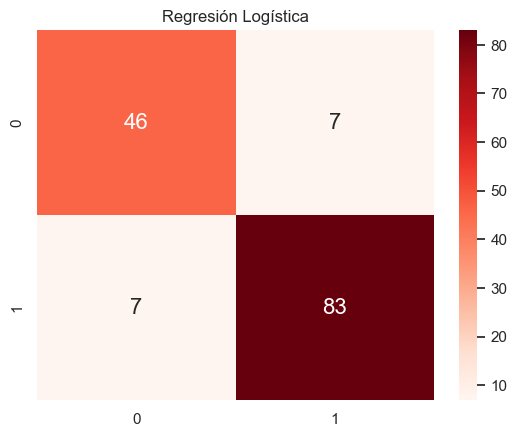

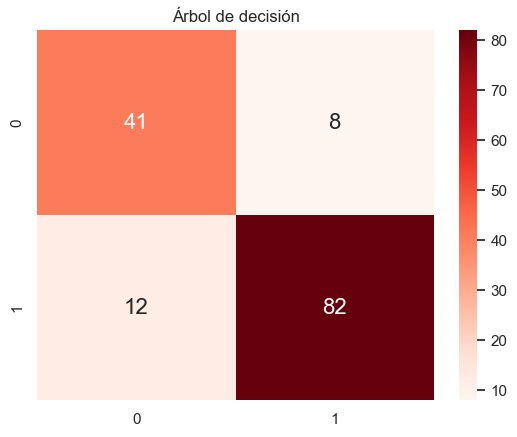

In [6]:
#Paquetes
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

#Obtención de la matriz
arrayLR = confusion_matrix(targetPredLR, targetTest)
arrayDT = confusion_matrix(targetPredDT, targetTest)
df_cmLR = pd.DataFrame(arrayLR)
df_cmDT = pd.DataFrame(arrayDT)

#Representación de la matriz de confusión
sn.set(font_scale=1)
plt.title('Regresión Logística')
plt.show(sn.heatmap(df_cmLR, annot=True, annot_kws={"size": 16}, cmap = 'Reds')) 
plt.title('Árbol de decisión')
plt.show(sn.heatmap(df_cmDT, annot=True, annot_kws={"size": 16}, cmap = 'Reds')) 

## Exactitud

In [8]:
#Paquete
from sklearn.metrics import accuracy_score

print('Exactitud regresión logística: ', accuracy_score(targetPredLR,targetTest))
print('Exactitud árbol de decisión: ', accuracy_score(targetPredDT,targetTest))

Exactitud regresión logística:  0.9020979020979021
Exactitud árbol de decisión:  0.8601398601398601


## Memoria, precisión y puntuación F1

In [22]:
#Paquetes
from sklearn.metrics import recall_score, precision_score, f1_score

print('Memoria regresión logística: ', recall_score(targetPredLR,targetTest))
print('Memoria árbol de decisión: ', recall_score(targetPredDT,targetTest))
print('Precisión regresión logística: ', precision_score(targetPredLR,targetTest))
print('Precisión árbol de decisión: ', precision_score(targetPredDT,targetTest))
print('Puntuación F1 regresión logística: ', f1_score(targetPredLR,targetTest))
print('Puntuación F1 de decisión: ', f1_score(targetPredDT,targetTest))

Memoria regresión logística:  0.9222222222222223
Memoria árbol de decisión:  0.8723404255319149
Precisión regresión logística:  0.9222222222222223
Precisión árbol de decisión:  0.9111111111111111
Puntuación F1 regresión logística:  0.9222222222222223
Puntuación F1 de decisión:  0.891304347826087


## Curva ROC  

In [23]:
#Paquete
from sklearn.metrics import roc_curve

#Obtención de las probabilidades de los datos de entrada
targetPredProbaLR = modelLR.predict_proba(dataTest)
print(targetPredProbaLR)

[[2.50654152e-01 7.49345848e-01]
 [4.43312467e-01 5.56687533e-01]
 [1.74558231e-01 8.25441769e-01]
 [3.21652488e-01 6.78347512e-01]
 [1.25311957e-01 8.74688043e-01]
 [2.60339661e-02 9.73966034e-01]
 [1.21654804e-01 8.78345196e-01]
 [4.13637234e-02 9.58636277e-01]
 [3.15012977e-03 9.96849870e-01]
 [3.69564910e-03 9.96304351e-01]
 [2.23049105e-01 7.76950895e-01]
 [7.17620189e-01 2.82379811e-01]
 [7.29950812e-03 9.92700492e-01]
 [8.97642026e-01 1.02357974e-01]
 [2.65748894e-01 7.34251106e-01]
 [2.82436514e-01 7.17563486e-01]
 [2.73795813e-03 9.97262042e-01]
 [9.99583279e-01 4.16720871e-04]
 [9.96899181e-01 3.10081924e-03]
 [9.99302578e-01 6.97422243e-04]
 [4.34193978e-02 9.56580602e-01]
 [8.03028860e-01 1.96971140e-01]
 [7.77869363e-02 9.22213064e-01]
 [4.57110433e-02 9.54288957e-01]
 [9.97005147e-01 2.99485288e-03]
 [8.59381333e-03 9.91406187e-01]
 [4.78495509e-03 9.95215045e-01]
 [4.27959483e-01 5.72040517e-01]
 [1.30575503e-01 8.69424497e-01]
 [9.89840912e-01 1.01590876e-02]
 [3.326504

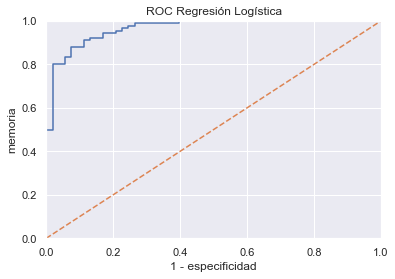

In [24]:
#Obtención curva ROC
memLR, unomenosespecLR, umbralLR = roc_curve(targetTest, targetPredProbaLR[:,1])

#Pintar Curva ROC
plt.title('ROC Regresión Logística')
plt.plot(memLR, unomenosespecLR)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('1 - especificidad')
plt.ylabel('memoria')
plt.show()

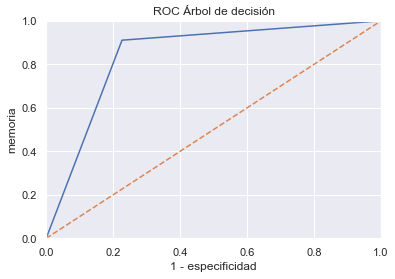

In [25]:
targetPredProbaDT = modelDT.predict_proba(dataTest)

#Obtención curva ROC
memDT, unomenosespecDT, umbralDT = roc_curve(targetTest, targetPredProbaDT[:,1])

#Pintar Curva ROC
plt.title('ROC Árbol de decisión')
plt.plot(memDT, unomenosespecDT)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('1 - especificidad')
plt.ylabel('memoria')
plt.show()

In [13]:
#Paquete
from sklearn.metrics import roc_auc_score

print('Área por debajo de la curva de la regresión logística: ', roc_auc_score(targetTest,targetPredProbaLR[:,1]))
print('Área por debajo de la curva del árbol de decisión: ', roc_auc_score(targetTest,targetPredProbaDT[:,1]))